## Figure 1 ~5 

### RoBERTa - visualization -> generate the figure 1for paper

1. Take a random set of 5k edges and visualize their RoBERTa embeddings with RoBERTa-based clusters. 
2. Compute a spreadsheet/CSV/TSV with number of edges per dimension in each cluster (for example, cluster 1 has 10 nodes for dimension temporal, 12 nodes for rel-other, etc.) 
3. Compute the 3 most frequent nodes in each cluster (consider both node1 and node2)


### RoBERTa vs Human dimensions  -> generate the figure 2 for paper
1. Use the same 5k edges from figure 1 and visualize their RoBERTa embeddings with dimension-based clusters.
2. Adapt the input to the jaccard score to not consider the last part of the edge id (like 000), and recompute the scores.
3. Quetsion: the Jaccard scores that you list in the report - are these selected to correspond to findings in fig1, or are these all jaccards above a threshold (of 0.2)?  Answer: >0.2

### Two-node visualization  -> generate the figure 3 for paper
1. Take the nodes `/c/en/food` and `/c/en/eat` and extract all their edges(extract all edges where either of them is either node1 or node2 in the graph) and visualize them like in figure 2.
2. Produce top 3 relations (with counts) and top 3 nodes (with counts) for each of the clusters.


### One-dimension visualization -> generate the figure 4 for paper
1. Pick one dimension (e.g., 'utility') and visualize randomly selected 5k edges as in figure 1 
2. Compute top-5 most frequent nodes and relations (with counts)


### One-relation visualization  -> generate the figure 5 for paper

1. Pick one relation (e.g., '/r/UsedFor') and visualize randomly selected 5k edges as in figure 1 
2. Compute top-5 most frequent nodes (with counts)

In [1]:
## parameters
cskg_connected_dim = '../input/cskg_dim.tsv.gz'   # human dimensions
edge_embeddings_roberta = '../tmp/edge_cand.tsv'  # sentence embedding by roberta (not all embeddings)
edge_embeddings_path = '../output/edge_embeddings_roberta.tsv' # sentence embedding by roberta (all embeddings)
clstr_roberta = '../tmp/clstr_roberta.tsv'        # machine dimensions
fig1_edge = '../tmp/fig1_edge.tsv'                # tsv for figure1 edge summary
fig2_sim = '../tmp/fig2_sim.tsv'                  # tsv for figure2 cluster similarity

In [2]:
import clustering
import random
import gzip
import umap
import rltk
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

## Figure 1

In [4]:
## 1. load human dimensions 
human_dim = clustering.load_clstr_hand(cskg_connected_dim)
print(set(list(human_dim.values())))
print(len(human_dim))

{'spatial', 'lexical', 'rel-other', 'taxonomic', 'part-whole', 'similarity', 'utility', 'desire', 'temporal', 'creation', 'distinctness', 'quality'}
5895122


In [5]:
## 2. load roberta sentence embedding (including 5000 edges)
roberta_emb = clustering.load_sent_emb(edge_embeddings_roberta)

## 3. load roberta cluster result
roberta_dim = clustering.load_clstr_auto(clstr_roberta)

100%|█████████▉| 2026115797/2026116200 [00:46<00:00, 44010227.72it/s]


In [6]:
## 4. select 5000 edges 
edgeids = []
data = []
roberta_cluster = []
human_cluster = []

for edge_info in roberta_emb:
    edge_id = edge_info[0]
    edge_emb = edge_info[1]
    human_lbl = human_dim.get(edge_id,None)
    roberta_lbl = roberta_dim[edge_id]
    
    if human_lbl is None:
        continue
    else:
        edgeids.append(edge_id)
        data.append(edge_emb)
        roberta_cluster.append(roberta_lbl)
        human_cluster.append(human_lbl)
        
candidate_edgeids = edgeids[:5000]
candidate_data = data[:5000]
candidate_roberta_cluster = roberta_cluster[:5000]
candidate_human_cluster = human_cluster[:5000]

In [11]:
# 5. use umap to do dimension reductions
new_emb = umap.UMAP(n_neighbors=20, min_dist=0.3, n_components=2).fit_transform(candidate_data)

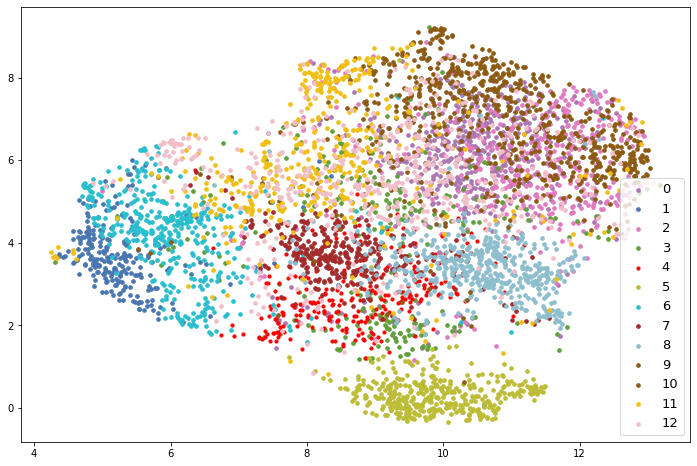

In [14]:
## 6.visualize for roberta dimension
x0,y0 = [],[] # 0
x1,y1 = [],[] # 1
x2,y2 = [],[] # 2
x3,y3 = [],[] # 3
x4,y4 = [],[] # 4
x5,y5 = [],[] # 5
x6,y6 = [],[] # 6
x7,y7 = [],[] # 7
x8,y8 = [],[] # 8
x9,y9 = [],[] # 9
x10,y10 = [],[] # 10
x11,y11 = [],[] # 11
x12,y12 = [],[] # 12

L0,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12 = [],[],[],[],[],[],[],[],[],[],[],[],[]

for i in range(len(new_emb)): 
    dimension = candidate_roberta_cluster[i]
    if dimension == '0':
        x0.append(float(new_emb[i][0]))
        y0.append(float(new_emb[i][1]))
        L0.append(candidate_edgeids[i])
    elif dimension == '1':
        x1.append(float(new_emb[i][0]))
        y1.append(float(new_emb[i][1]))
        L1.append(candidate_edgeids[i])
    elif dimension == '2':
        x2.append(float(new_emb[i][0]))
        y2.append(float(new_emb[i][1]))
        L2.append(candidate_edgeids[i])
    elif dimension == '3':
        x3.append(float(new_emb[i][0]))
        y3.append(float(new_emb[i][1]))
        L3.append(candidate_edgeids[i])
    elif dimension == '4':
        x4.append(float(new_emb[i][0]))
        y4.append(float(new_emb[i][1]))
        L4.append(candidate_edgeids[i])
    elif dimension == '5':
        x5.append(float(new_emb[i][0]))
        y5.append(float(new_emb[i][1]))
        L5.append(candidate_edgeids[i])
    elif dimension == '6':
        x6.append(float(new_emb[i][0]))
        y6.append(float(new_emb[i][1]))
        L6.append(candidate_edgeids[i])
    elif dimension == '7':
        x7.append(float(new_emb[i][0]))
        y7.append(float(new_emb[i][1]))
        L7.append(candidate_edgeids[i])
    elif dimension == '8':
        x8.append(float(new_emb[i][0]))
        y8.append(float(new_emb[i][1]))
        L8.append(candidate_edgeids[i])
    elif dimension == '9':
        x9.append(float(new_emb[i][0]))
        y9.append(float(new_emb[i][1]))
        L9.append(candidate_edgeids[i])
    elif dimension == '10':
        x10.append(float(new_emb[i][0]))
        y10.append(float(new_emb[i][1]))
        L10.append(candidate_edgeids[i])
    elif dimension == '11':
        x11.append(float(new_emb[i][0]))
        y11.append(float(new_emb[i][1]))
        L11.append(candidate_edgeids[i])
    elif dimension == '12':
        x12.append(float(new_emb[i][0]))
        y12.append(float(new_emb[i][1]))
        L12.append(candidate_edgeids[i])
    else:
        print('no relation find')
        
plt.figure(figsize=(12,8))
plot0 = plt.scatter(x0, y0,color=(172/255,118/255,177/255), label='0',s=13)  
plot1 = plt.scatter(x1, y1,color=(72/255,118/255,177/255), label='1',s=13)    
plot2 = plt.scatter(x2, y2,color=(225/255,122/255,193/255),label='2',s=13)    
plot3 = plt.scatter(x3, y3,color=(97/255,159/255,58/255),label='3',s=13)
plot4 = plt.scatter(x4, y4,c='red',label='4',s=10)    
plot5 = plt.scatter(x5, y5,color=(188/255,188/255,53/255),label='5',s=13)    
plot6 = plt.scatter(x6, y6,color=(41/255,190/255,206/255),label='6',s=13)
plot7 = plt.scatter(x7, y7,c='brown',label='7',s=13)
plot8 = plt.scatter(x8, y8,color=(141/255,190/255,206/255),label='8',s=13)
plot9 = plt.scatter(x9, y9,color=(141/255,90/255,20/255),label='9',s=13)
plot10 = plt.scatter(x10, y10,color=(141/255,90/255,20/255),label='10',s=13)
plot11 = plt.scatter(x11, y11,color=(241/255,190/255,20/255),label='11',s=13)
plot12 = plt.scatter(x12, y12,color=(241/255,190/255,200/255),label='12',s=13)

plt.legend(['0','1','2','3','4','5','6','7','8','9','10','11','12'],loc='best',prop={'size':13})
# plt.savefig("sentence_auto.pdf")
plt.show()

In [43]:
## 7. Compute a TSV with number of edges per dimension in each cluster 
## (for example, cluster 1 has 10 nodes for dimension temporal, 12 nodes for rel-other, etc.)
## format  machine_dim    human_dim   edge_num

# candidate_edgeids 
# candidate_roberta_cluster 
# candidate_human_cluster 

maping_dict = {}
for index,edge in enumerate(candidate_edgeids):
    auto_dim = candidate_roberta_cluster[index]
    human_dim =  candidate_human_cluster[index] 
    pivot = f"{auto_dim}_{human_dim}"
    maping_dict[pivot] = maping_dict.get(pivot,0)+2

mapping_summary = sorted(maping_dict.items(),key=lambda x:x[-1],reverse=True)

with open(fig1_edge,'w') as f:
    f.write("auto_dim\thuman_dim\tedge number\n")
    for row in mapping_summary:
        auto_dim = row[0].split('_')[0]
        human_dim = row[0].split('_')[1]
        num = row[1]
        f.write(f"{auto_dim}\t{human_dim}\t{num}\n") 

In [40]:
##8. Compute the 3 most frequent nodes in each cluster (consider both node1 and node2)
## first of all, we need to retrieve each edge's nodes
id_to_nodes = {}
with gzip.open(cskg_connected_dim,'rt') as f:
    for line in f:
        content = line.split('\t')
        edge_id = content[0]
        node1 = content[1]
        node2 = content[3]
        id_to_nodes[edge_id] = id_to_nodes.get(edge_id,[])
        id_to_nodes[edge_id].append(node1)
        id_to_nodes[edge_id].append(node2) 

In [62]:
mapping_node = {}
for index,edge in enumerate(candidate_edgeids):
    nodes = id_to_nodes[edge]
    auto_dim =  candidate_roberta_cluster[index]
    mapping_node[auto_dim] = mapping_node.get(auto_dim,{})
    for node in nodes:  
        mapping_node[auto_dim][node] = mapping_node[auto_dim].get(node,0)+1
    
print("3 most frequent nodes in each cluster:")
for auto_dim in mapping_node:
    values = mapping_node[auto_dim]
    sort_res = sorted(values.items(),key=lambda x:x[-1],reverse=True)[:3]
    print(f"{auto_dim}: {sort_res}")

3 most frequent nodes in each cluster:
6: [('/c/en/happy', 11), ('/c/en/excited', 4), ('/c/en/person', 3)]
0: [('/c/en/vulgar', 3), ('/c/en/drug', 3), ('/c/en/milk', 2)]
10: [('/c/en/county_seat', 5), ('/c/en/chinese', 3), ('/c/en/dog', 3)]
11: [('/c/en/medicine', 7), ('/c/en/historical', 6), ('/c/en/slang', 5)]
4: [('/c/en/unfavorable', 2), ('/c/en/spastic', 2), ('/c/en/otherworldly', 2)]
9: [('/c/en/zoology', 13), ('/c/en/plant/n', 5), ('/c/en/organic_compound', 5)]
8: [('rg:en_pink-tinged', 3), ('rg:en_olive-drab', 3), ('rg:en_rose-lavender', 3)]
2: [('/c/en/protein', 4), ('/c/en/gold', 2), ('/c/en/air_traffic/n/wn/group', 2)]
7: [('/c/en/strong', 4), ('/c/en/rest', 3), ('rg:en_prognosticative', 2)]
5: [('rg:en_twenty-eighth', 4), ('/c/en/umptieth', 3), ('rg:en_hundred-and-eightieth', 3)]
3: [('/c/en/woman/n/wn/person', 3), ('/c/en/field/n/wn/location', 3), ('/c/en/ocular/a/wn', 2)]
12: [('/c/en/case', 4), ('/c/en/sign/n/wn/communication', 2), ('/c/en/rack/n/wn/artifact', 2)]
1: [('

## Figure 2

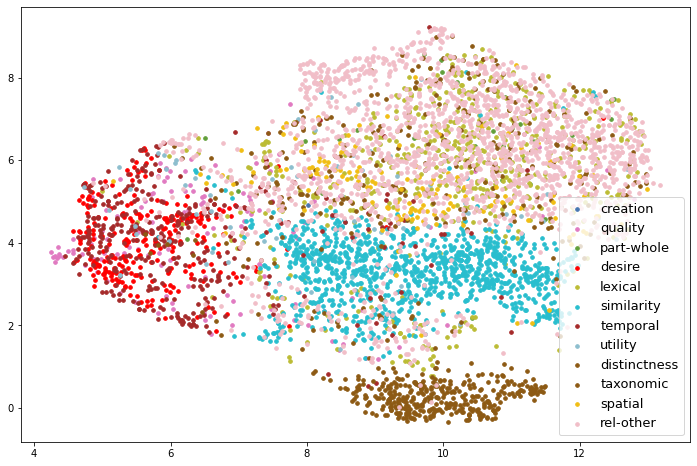

In [63]:
## 1.visualize for human dimension
x1,y1 = [],[] # creation
x2,y2 = [],[] # quality
x3,y3 = [],[] # part-whole
x4,y4 = [],[] # desire
x5,y5 = [],[] # lexical
x6,y6 = [],[] # similarity
x7,y7 = [],[] # temporal
x8,y8 = [],[] # utility
x9,y9 = [],[] # distinctness
x10,y10 = [],[] # taxonomic
x11,y11 = [],[] # spatial
x12,y12 = [],[] # rel-other

H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12 = [],[],[],[],[],[],[],[],[],[],[],[]

for i in range(len(new_emb)): 
    dimension = candidate_human_cluster[i]
    if dimension == 'creation':
        x1.append(float(new_emb[i][0]))
        y1.append(float(new_emb[i][1]))
        H1.append(candidate_edgeids[i])
    elif dimension == 'quality':
        x2.append(float(new_emb[i][0]))
        y2.append(float(new_emb[i][1]))
        H2.append(candidate_edgeids[i])
    elif dimension == 'part-whole':
        x3.append(float(new_emb[i][0]))
        y3.append(float(new_emb[i][1]))
        H3.append(candidate_edgeids[i])
    elif dimension == 'desire':
        x4.append(float(new_emb[i][0]))
        y4.append(float(new_emb[i][1]))
        H4.append(candidate_edgeids[i])
    elif dimension == 'lexical':
        x5.append(float(new_emb[i][0]))
        y5.append(float(new_emb[i][1]))
        H5.append(candidate_edgeids[i])
    elif dimension == 'similarity':
        x6.append(float(new_emb[i][0]))
        y6.append(float(new_emb[i][1]))
        H6.append(candidate_edgeids[i])
    elif dimension == 'temporal':
        x7.append(float(new_emb[i][0]))
        y7.append(float(new_emb[i][1]))
        H7.append(candidate_edgeids[i])
    elif dimension == 'utility':
        x8.append(float(new_emb[i][0]))
        y8.append(float(new_emb[i][1]))
        H8.append(candidate_edgeids[i])
    elif dimension == 'distinctness':
        x9.append(float(new_emb[i][0]))
        y9.append(float(new_emb[i][1]))
        H9.append(candidate_edgeids[i])
    elif dimension == 'taxonomic':
        x10.append(float(new_emb[i][0]))
        y10.append(float(new_emb[i][1]))
        H10.append(candidate_edgeids[i])
    elif dimension == 'spatial':
        x11.append(float(new_emb[i][0]))
        y11.append(float(new_emb[i][1]))
        H11.append(candidate_edgeids[i])
    elif dimension == 'rel-other':
        x12.append(float(new_emb[i][0]))
        y12.append(float(new_emb[i][1]))
        H12.append(candidate_edgeids[i])
    else:
        print('no relation find')
        
plt.figure(figsize=(12,8))
plot1 = plt.scatter(x1, y1,color=(72/255,118/255,177/255), label='creation',s=13)    
plot2 = plt.scatter(x2, y2,color=(225/255,122/255,193/255),label='quality',s=13)    
plot3 = plt.scatter(x3, y3,color=(97/255,159/255,58/255),label='part-whole',s=13)
plot4 = plt.scatter(x4, y4,c='red',label='desire',s=13)    
plot5 = plt.scatter(x5, y5,color=(188/255,188/255,53/255),label='lexical',s=13)    
plot6 = plt.scatter(x6, y6,color=(41/255,190/255,206/255),label='similarity',s=13)

plot7 = plt.scatter(x7, y7,c='brown',label='temporal',s=13)
plot8 = plt.scatter(x8, y8,color=(141/255,190/255,206/255),label='utility',s=13)
plot9 = plt.scatter(x9, y9,color=(141/255,90/255,20/255),label='distinctness',s=13)
plot10 = plt.scatter(x10, y10,color=(141/255,90/255,20/255),label='taxonomic',s=13)
plot11 = plt.scatter(x11, y11,color=(241/255,190/255,20/255),label='spatial',s=13)
plot12 = plt.scatter(x12, y12,color=(241/255,190/255,200/255),label='rel-other',s=13)

plt.legend(["creation",'quality','part-whole','desire','lexical','similarity','temporal'
           ,'utility','distinctness','taxonomic','spatial','rel-other'],loc='best',prop={'size':13})
# plt.savefig("sentence_human.pdf")
plt.show()

In [80]:
## Compute Jaccard similarity between human dim and auto dim

def cal_sim(list1,list2):
    return rltk.jaccard_index_similarity(set(list1),set(list2))

def process(edge_id):
    content = '/'.join(edge_id.split('/')[:-1])
    last_part = edge_id.split('/')[-1]
    last_part = last_part.split('-0')
    if len(last_part) == 2:
        content = content+'/' + last_part[0]
        return content
    else:
        print('='*10)
        print(edge_id)
        return content
        
        
human_dimensions = {}
auto_dimensions = {}
for index,edge_id in enumerate(candidate_edgeids):
    edge = process(edge_id)
    auto_dim = candidate_roberta_cluster[index]
    human_dim = candidate_human_cluster[index]
    
    human_dimensions[human_dim] = human_dimensions.get(human_dim,[])
    human_dimensions[human_dim].append(edge)
    
    auto_dimensions[auto_dim] = auto_dimensions.get(auto_dim,[])
    auto_dimensions[auto_dim].append(edge)

In [86]:
## fig2_sim
sim_dict = {}

with open(fig2_sim,'w') as f:
    f.write(f"auto_dim\thuman_dim\tsimilarity\n")
    for auto_dim in auto_dimensions:
        list1 = auto_dimensions[auto_dim]
        sim_dict[auto_dim] = sim_dict.get(auto_dim,{})
        for human_dim in human_dimensions:
            list2 = human_dimensions[human_dim]
            sim = cal_sim(list1,list2)
            f.write(f"{auto_dim}\t{human_dim}\t{sim}\n") 
            sim_dict[auto_dim][human_dim] = sim_dict[auto_dim].get(human_dim,sim)           

In [94]:
for auto_dim in sim_dict:
    similarities = sorted(sim_dict[auto_dim].items(),key=lambda x:x[-1],reverse=True)[:3]
    similarities = [(i[0],round(i[1],3))  for i in similarities]
    print(auto_dim,similarities)
    print()

6 [('temporal', 0.322), ('desire', 0.283), ('quality', 0.054)]

0 [('lexical', 0.205), ('rel-other', 0.121), ('taxonomic', 0.06)]

10 [('rel-other', 0.169), ('taxonomic', 0.015), ('quality', 0.007)]

11 [('rel-other', 0.11), ('quality', 0.068), ('taxonomic', 0.066)]

4 [('similarity', 0.21), ('quality', 0.015), ('lexical', 0.008)]

9 [('rel-other', 0.143), ('lexical', 0.085), ('taxonomic', 0.081)]

8 [('similarity', 0.452), ('lexical', 0.004), ('taxonomic', 0.003)]

2 [('lexical', 0.133), ('rel-other', 0.122), ('taxonomic', 0.075)]

7 [('similarity', 0.295), ('quality', 0.009), ('taxonomic', 0.005)]

5 [('distinctness', 0.916), ('lexical', 0.018), ('taxonomic', 0.003)]

3 [('spatial', 0.119), ('lexical', 0.061), ('quality', 0.053)]

12 [('rel-other', 0.183), ('taxonomic', 0.059), ('spatial', 0.053)]

1 [('desire', 0.258), ('temporal', 0.202), ('quality', 0.087)]



## Figure 3

In [3]:
two_nodes = {}  # => record edge id and dimension
edge_nodes = {} # => record edge id and its nodes
edge_rel = {}   # => record edge id and its relation
with gzip.open(cskg_connected_dim,'rt') as f:
    for line in f:
        content = line.split('\t')
        edge_id = content[0]
        node1 = content[1]
        relation = content[2]
        node2 = content[3]
        dimension = content[7]
        if node1 in ['/c/en/food' ,'/c/en/eat'] or node2 in ['/c/en/food' ,'/c/en/eat']:
            two_nodes[edge_id] = dimension
            edge_nodes[edge_id] = [node1,node2]
            edge_rel[edge_id] = relation
            
edge_embs = {} # => record edge id and it embedding
with tqdm(total=os.path.getsize(edge_embeddings_path)) as pbar:
    with open(edge_embeddings_path) as f:
        for line in f: # don't use f.readlines() , file is too large , spend too much read it once 
            content = line.split('\t')
            edge_id = content[0] 
            edge_value = content[-1]
            if edge_id in two_nodes:
                edge_embs[edge_id] = edge_value
            pbar.update(len(line))
for key in edge_embs.keys():
    edge_embs[key] = [ float(i) for i in edge_embs[key].split(',')]

100%|█████████▉| 120706645419/120706669991 [03:07<00:00, 645140523.62it/s]


In [4]:
# prepare data of two nodes
edgeids = []
data = []
clusters = [] 
for edge_id,value in edge_embs.items(): 
    cluster = two_nodes[edge_id]
    edgeids.append(edge_id)
    data.append(value)
    clusters.append(cluster)
    
# use uamp to do dimension reductions
new_emb = umap.UMAP(n_neighbors=20, min_dist=0.3, n_components=2).fit_transform(data)

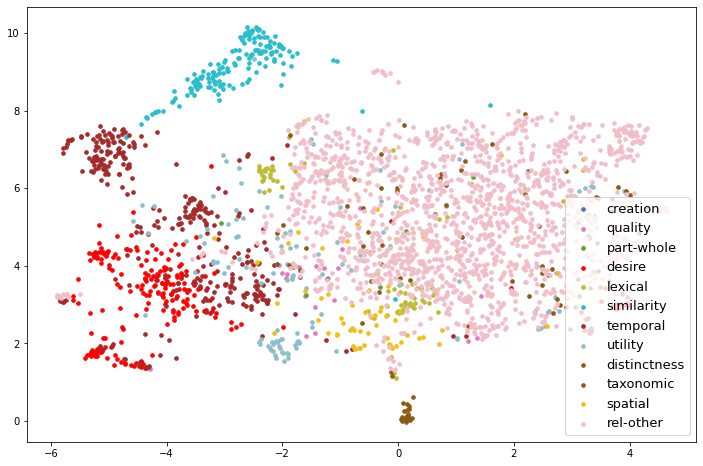

In [5]:
## visualization
x1,y1 = [],[] # creation
x2,y2 = [],[] # quality
x3,y3 = [],[] # part-whole
x4,y4 = [],[] # desire
x5,y5 = [],[] # lexical
x6,y6 = [],[] # similarity
x7,y7 = [],[] # temporal
x8,y8 = [],[] # utility
x9,y9 = [],[] # distinctness
x10,y10 = [],[] # taxonomic
x11,y11 = [],[] # spatial
x12,y12 = [],[] # rel-other

H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12 = [],[],[],[],[],[],[],[],[],[],[],[]

for i in range(len(new_emb)): 
    dimension = clusters[i]
    if dimension == 'creation':
        x1.append(float(new_emb[i][0]))
        y1.append(float(new_emb[i][1]))
        H1.append(edgeids[i])
    elif dimension == 'quality':
        x2.append(float(new_emb[i][0]))
        y2.append(float(new_emb[i][1]))
        H2.append(edgeids[i])
    elif dimension == 'part-whole':
        x3.append(float(new_emb[i][0]))
        y3.append(float(new_emb[i][1]))
        H3.append(edgeids[i])
    elif dimension == 'desire':
        x4.append(float(new_emb[i][0]))
        y4.append(float(new_emb[i][1]))
        H4.append(edgeids[i])
    elif dimension == 'lexical':
        x5.append(float(new_emb[i][0]))
        y5.append(float(new_emb[i][1]))
        H5.append(edgeids[i])
    elif dimension == 'similarity':
        x6.append(float(new_emb[i][0]))
        y6.append(float(new_emb[i][1]))
        H6.append(edgeids[i])
    elif dimension == 'temporal':
        x7.append(float(new_emb[i][0]))
        y7.append(float(new_emb[i][1]))
        H7.append(edgeids[i])
    elif dimension == 'utility':
        x8.append(float(new_emb[i][0]))
        y8.append(float(new_emb[i][1]))
        H8.append(edgeids[i])
    elif dimension == 'distinctness':
        x9.append(float(new_emb[i][0]))
        y9.append(float(new_emb[i][1]))
        H9.append(edgeids[i])
    elif dimension == 'taxonomic':
        x10.append(float(new_emb[i][0]))
        y10.append(float(new_emb[i][1]))
        H10.append(edgeids[i])
    elif dimension == 'spatial':
        x11.append(float(new_emb[i][0]))
        y11.append(float(new_emb[i][1]))
        H11.append(edgeids[i])
    elif dimension == 'rel-other':
        x12.append(float(new_emb[i][0]))
        y12.append(float(new_emb[i][1]))
        H12.append(edgeids[i])
    else:
        print('no relation find')
        
plt.figure(figsize=(12,8))
plot1 = plt.scatter(x1, y1,color=(72/255,118/255,177/255), label='creation',s=13)    
plot2 = plt.scatter(x2, y2,color=(225/255,122/255,193/255),label='quality',s=13)    
plot3 = plt.scatter(x3, y3,color=(97/255,159/255,58/255),label='part-whole',s=13)
plot4 = plt.scatter(x4, y4,c='red',label='desire',s=13)    
plot5 = plt.scatter(x5, y5,color=(188/255,188/255,53/255),label='lexical',s=13)    
plot6 = plt.scatter(x6, y6,color=(41/255,190/255,206/255),label='similarity',s=13)
plot7 = plt.scatter(x7, y7,c='brown',label='temporal',s=13)
plot8 = plt.scatter(x8, y8,color=(141/255,190/255,206/255),label='utility',s=13)
plot9 = plt.scatter(x9, y9,color=(141/255,90/255,20/255),label='distinctness',s=13)
plot10 = plt.scatter(x10, y10,color=(141/255,90/255,20/255),label='taxonomic',s=13)
plot11 = plt.scatter(x11, y11,color=(241/255,190/255,20/255),label='spatial',s=13)
plot12 = plt.scatter(x12, y12,color=(241/255,190/255,200/255),label='rel-other',s=13)

plt.legend(["creation",'quality','part-whole','desire','lexical','similarity','temporal'
           ,'utility','distinctness','taxonomic','spatial','rel-other'],loc='lower right',prop={'size':13})
# plt.savefig("two_nodes.pdf")
plt.show()

In [6]:
## get the top3 relations and top 3 nodes for each of cluster
# data that will be used: edgeids,clusters,edge_nodes,edge_rel
# edgeids = [] data = [] clusters = [] edge_nodes = {} edge_rel = {} 
print(f"Edge number(with specific two nodes): {len(edgeids)}")

cluster_nodes, cluster_res = {},{}

for index, edge_id in enumerate(edgeids):
    nodes = edge_nodes[edge_id]
    cluster = clusters[index]
    cluster_nodes[cluster] = cluster_nodes.get(cluster,{})
    cluster_res[cluster] = cluster_res.get(cluster,{})
    
    for node in nodes:
        cluster_nodes[cluster][node] = cluster_nodes[cluster].get(node,0)+1
        
    relation = edge_rel[edge_id]
    cluster_res[cluster][relation] =  cluster_res[cluster].get(relation,0)+1
    
    ## cluster_nodes will be like: {'rel-other': {'/c/en/86/v': 1, '/c/en/food': 1}}
    ## cluster_res will be like:  {'rel-other': {'/r/RelatedTo': 1}}

Edge number(with specific two nodes): 2661


In [117]:
cluster_res.keys()

dict_keys(['rel-other', 'desire', 'lexical', 'similarity', 'taxonomic', 'temporal', 'utility', 'distinctness', 'spatial', 'part-whole', 'quality'])

In [14]:
## get top3 relations  for each cluster
for cluster in cluster_res:
    top3 = sorted(cluster_res[cluster].items(),key=lambda x:x[-1],reverse=True)[:3]
    print(f"{cluster}: {top3}")
    print()

rel-other: [('/r/RelatedTo', 1488), ('/r/HasContext', 55), ('/r/EtymologicallyRelatedTo', 10)]

desire: [('at:xWant', 78), ('/r/MotivatedByGoal', 47), ('at:xIntent', 47)]

lexical: [('/r/DerivedFrom', 65), ('/r/FormOf', 10)]

similarity: [('/r/Synonym', 155), ('/r/DefinedAs', 1)]

taxonomic: [('/r/IsA', 88)]

temporal: [('/r/HasLastSubevent', 113), ('/r/HasPrerequisite', 69), ('/r/HasSubevent', 60)]

utility: [('/r/UsedFor', 53), ('/r/CapableOf', 36), ('/r/ReceivesAction', 36)]

distinctness: [('/r/Antonym', 18), ('/r/DistinctFrom', 6)]

spatial: [('/r/AtLocation', 63), ('/r/LocatedNear', 1)]

part-whole: [('/r/HasA', 5), ('/r/MadeOf', 1)]

quality: [('/r/HasProperty', 15), ('at:xAttr', 6)]



In [13]:
## get top3 nodes  for each cluster
for cluster in cluster_res:
    top3 = sorted(cluster_nodes[cluster].items(),key=lambda x:x[-1],reverse=True)[:3]
    print(f"{cluster}: {top3}")
    print()

rel-other: [('/c/en/food', 1165), ('/c/en/eat', 390), ('/c/en/feed', 4)]

desire: [('/c/en/eat', 155), ('/c/en/food', 75), ('/c/en/cat', 2)]

lexical: [('/c/en/food', 48), ('/c/en/eat', 27), ('/c/en/agri_food', 1)]

similarity: [('/c/en/eat', 83), ('/c/en/food', 74), ('/c/en/bite', 3)]

taxonomic: [('/c/en/food', 85), ('/c/en/eat', 3), ('/c/en/alphabet_soup', 1)]

temporal: [('/c/en/eat', 250), ('/c/en/food', 69), ('/c/en/diminish_own_hunger', 4)]

utility: [('/c/en/food', 85), ('/c/en/eat', 43), ('/c/en/dish', 2)]

distinctness: [('/c/en/eat', 14), ('/c/en/food', 10), ('/c/en/drink', 7)]

spatial: [('/c/en/food', 62), ('/c/en/plate', 3), ('/c/en/container', 2)]

part-whole: [('/c/en/food', 5), ('/c/en/effect_of_suppressing_hunger', 1), ('/c/en/carbon', 1)]

quality: [('/c/en/food', 21), ('/c/en/edible', 1), ('/c/en/fried_in_wok', 1)]



## Figure 4

In [11]:
# load edges with the dimension 'utility' and roberta's clustering result
edge_dims = {}  # => record edge id with 'utility' dimension
edge_nodes = {} # => record edge id and its nodes
edge_rel = {}   # => record edge id and its relation
with gzip.open(cskg_connected_dim,'rt') as f:
    for line in f:
        content = line.split('\t')
        edge_id = content[0] 
        node1 = content[1]
        relation = content[2]
        node2 = content[3]
        dimension = content[7]
        if dimension == 'utility':
            edge_dims[edge_id] = dimension  
            edge_nodes[edge_id] = [node1,node2]
            edge_rel[edge_id] = relation
            
roberta_dim = clustering.load_clstr_auto(clstr_roberta)

#get edge embeddings for such dimension (utility)
edge_embs = {} # => record edge id and it embedding
with tqdm(total=os.path.getsize(edge_embeddings_path)) as pbar:
    with open(edge_embeddings_path) as f:
        for line in f: # don't use f.readlines() , file is too large , spend too much read it once 
            content = line.split('\t')
            edge_id = content[0] 
            edge_value = content[-1]
            if edge_id in edge_dims:
                edge_embs[edge_id] = edge_value
            pbar.update(len(line))
            
for key in edge_embs.keys():
    edge_embs[key] = [ float(i) for i in edge_embs[key].split(',')]

100%|█████████▉| 120706645419/120706669991 [03:21<00:00, 598721632.68it/s]


In [12]:
## preapre data 
edgeids = []
data = []
clusters = []
for edge_id,value in edge_embs.items(): 
    cluster = roberta_dim[edge_id]
    edgeids.append(edge_id)
    data.append(value)
    clusters.append(cluster)

In [16]:
## get top5 relations and top5 nodes for each of cluster
# data that will be used: edgeids,clusters,edge_nodes,edge_rel
# edgeids = [] data = [] clusters = [] edge_nodes = {} edge_rel = {} 
print(f"Edge number(with specific two nodes): {len(edgeids)}")
cluster_nodes, cluster_res = {},{}
for index, edge_id in enumerate(edgeids):
    nodes = edge_nodes[edge_id]
    cluster = clusters[index]
    cluster_nodes[cluster] = cluster_nodes.get(cluster,{})
    cluster_res[cluster] = cluster_res.get(cluster,{})
    
    for node in nodes:
        cluster_nodes[cluster][node] = cluster_nodes[cluster].get(node,0)+1
        
    relation = edge_rel[edge_id]
    cluster_res[cluster][relation] =  cluster_res[cluster].get(relation,0)+1
    
    ## cluster_nodes will be like: {'rel-other': {'/c/en/86/v': 1, '/c/en/food': 1}}
    ## cluster_res will be like:  {'rel-other': {'/r/RelatedTo': 1}}

Edge number(with specific two nodes): 90765


In [28]:
## get top5 relations  for each cluster
for cluster in cluster_res:
    top5 = sorted(cluster_res[cluster].items(),key=lambda x:x[-1],reverse=True)
    print(f"{cluster}: {top5}")
    print()

0: [('/r/UsedFor', 3581), ('/r/CapableOf', 2094), ('/r/ReceivesAction', 252), ('/r/NotCapableOf', 11)]

8: [('/r/CapableOf', 216), ('/r/UsedFor', 23), ('/r/ReceivesAction', 20), ('/r/NotCapableOf', 2)]

9: [('/r/UsedFor', 968), ('/r/CapableOf', 745), ('/r/ReceivesAction', 101), ('/r/NotCapableOf', 3)]

3: [('/r/CapableOf', 9231), ('/r/UsedFor', 3723), ('/r/ReceivesAction', 1585), ('/r/NotCapableOf', 53)]

7: [('/r/CapableOf', 687), ('/r/UsedFor', 139), ('/r/ReceivesAction', 106), ('/r/NotCapableOf', 1)]

1: [('/r/CapableOf', 432), ('/r/UsedFor', 408), ('/r/ReceivesAction', 155), ('/r/NotCapableOf', 9)]

11: [('/r/CapableOf', 15519), ('/r/UsedFor', 11335), ('/r/ReceivesAction', 2254), ('/r/NotCapableOf', 11)]

12: [('/r/UsedFor', 9334), ('/r/CapableOf', 5370), ('/r/ReceivesAction', 835), ('/r/NotCapableOf', 12)]

2: [('/r/CapableOf', 2611), ('/r/UsedFor', 2375), ('/r/ReceivesAction', 129), ('/r/NotCapableOf', 19)]

6: [('/r/UsedFor', 9500), ('/r/CapableOf', 4305), ('/r/ReceivesAction', 

In [29]:
## get top5 nodes  for each cluster
for cluster in cluster_res:
    top5 = sorted(cluster_nodes[cluster].items(),key=lambda x:x[-1],reverse=True)[:5]
    print(f"{cluster}: {top5}")
    print()

0: [('/c/en/water', 94), ('/c/en/african_elephant/n/wn/animal', 88), ('/c/en/earth_science/n/wn/cognition', 74), ('/c/en/factory/n/wn/artifact', 61), ('/c/en/pool', 52)]

8: [('/c/en/catch/n/wn/person', 21), ('/c/en/put/v/wn/contact', 14), ('/c/en/engage/v/wn/contact', 14), ('/c/en/cashmere/n/wn/artifact', 10), ('/c/en/african_elephant/n/wn/animal', 8)]

9: [('/c/en/zebra/n/wn/animal', 22), ('/c/en/bat/v/wn/contact', 21), ('/c/en/book', 21), ('/c/en/learning_about_science', 21), ('/c/en/machine', 18)]

3: [('/c/en/person', 305), ('/c/en/people', 246), ('/c/en/body_count/n/wn/quantity', 145), ('/c/en/sit/v/wn/contact', 111), ('/c/en/put/v/wn/contact', 91)]

7: [('/c/en/conserve/v/wn/possession', 43), ('/c/en/we', 30), ('/c/en/catch/n/wn/person', 26), ('/c/en/bunch_together/v/wn/motion', 24), ('/c/en/anyone', 24)]

1: [('/c/en/people', 37), ('/c/en/meeting_people', 34), ('/c/en/wait/v/wn/stative', 30), ('/c/en/chatting_with_friends', 30), ('/c/en/vexatious_litigant', 26)]

11: [('/c/en/p

In [41]:
# random pick 5000 edges from 90765 edges
import numpy as np
idxs = np.random.randint(0,90765 , size=5000)

candidate_edgeids = [edgeids[i] for i in idxs]
candidate_data = [ data[i] for i in idxs]
candidate_roberta_cluster = [ clusters[i] for i in idxs]

In [42]:
# use uamp to do dimension reductions
new_emb = umap.UMAP(n_neighbors=20, min_dist=0.3, n_components=2).fit_transform(candidate_data)

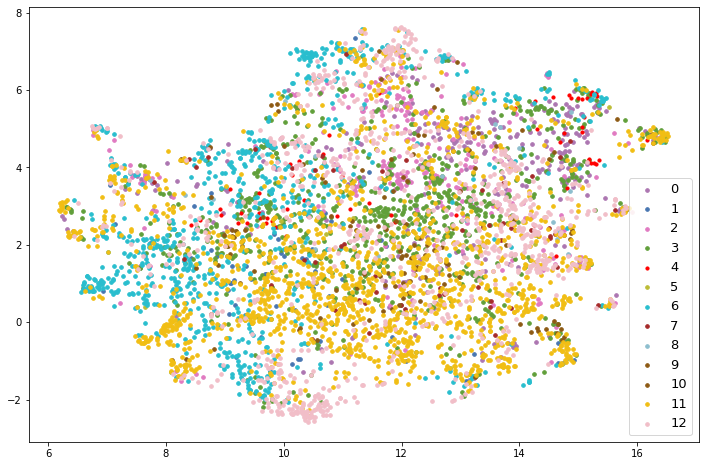

In [43]:
## visualize for roberta dimension
x0,y0 = [],[] # 0
x1,y1 = [],[] # 1
x2,y2 = [],[] # 2
x3,y3 = [],[] # 3
x4,y4 = [],[] # 4
x5,y5 = [],[] # 5
x6,y6 = [],[] # 6
x7,y7 = [],[] # 7
x8,y8 = [],[] # 8
x9,y9 = [],[] # 9
x10,y10 = [],[] # 10
x11,y11 = [],[] # 11
x12,y12 = [],[] # 12

L0,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12 = [],[],[],[],[],[],[],[],[],[],[],[],[]

for i in range(len(new_emb)): 
    dimension = candidate_roberta_cluster[i]
    if dimension == '0':
        x0.append(float(new_emb[i][0]))
        y0.append(float(new_emb[i][1]))
        L0.append(candidate_edgeids[i])
    elif dimension == '1':
        x1.append(float(new_emb[i][0]))
        y1.append(float(new_emb[i][1]))
        L1.append(candidate_edgeids[i])
    elif dimension == '2':
        x2.append(float(new_emb[i][0]))
        y2.append(float(new_emb[i][1]))
        L2.append(candidate_edgeids[i])
    elif dimension == '3':
        x3.append(float(new_emb[i][0]))
        y3.append(float(new_emb[i][1]))
        L3.append(candidate_edgeids[i])
    elif dimension == '4':
        x4.append(float(new_emb[i][0]))
        y4.append(float(new_emb[i][1]))
        L4.append(candidate_edgeids[i])
    elif dimension == '5':
        x5.append(float(new_emb[i][0]))
        y5.append(float(new_emb[i][1]))
        L5.append(candidate_edgeids[i])
    elif dimension == '6':
        x6.append(float(new_emb[i][0]))
        y6.append(float(new_emb[i][1]))
        L6.append(candidate_edgeids[i])
    elif dimension == '7':
        x7.append(float(new_emb[i][0]))
        y7.append(float(new_emb[i][1]))
        L7.append(candidate_edgeids[i])
    elif dimension == '8':
        x8.append(float(new_emb[i][0]))
        y8.append(float(new_emb[i][1]))
        L8.append(candidate_edgeids[i])
    elif dimension == '9':
        x9.append(float(new_emb[i][0]))
        y9.append(float(new_emb[i][1]))
        L9.append(candidate_edgeids[i])
    elif dimension == '10':
        x10.append(float(new_emb[i][0]))
        y10.append(float(new_emb[i][1]))
        L10.append(candidate_edgeids[i])
    elif dimension == '11':
        x11.append(float(new_emb[i][0]))
        y11.append(float(new_emb[i][1]))
        L11.append(candidate_edgeids[i])
    elif dimension == '12':
        x12.append(float(new_emb[i][0]))
        y12.append(float(new_emb[i][1]))
        L12.append(candidate_edgeids[i])
    else:
        print('no relation find')
        
plt.figure(figsize=(12,8))
plot0 = plt.scatter(x0, y0,color=(172/255,118/255,177/255), label='0',s=13)  
plot1 = plt.scatter(x1, y1,color=(72/255,118/255,177/255), label='1',s=13)    
plot2 = plt.scatter(x2, y2,color=(225/255,122/255,193/255),label='2',s=13)    
plot3 = plt.scatter(x3, y3,color=(97/255,159/255,58/255),label='3',s=13)
plot4 = plt.scatter(x4, y4,c='red',label='4',s=10)    
plot5 = plt.scatter(x5, y5,color=(188/255,188/255,53/255),label='5',s=13)    
plot6 = plt.scatter(x6, y6,color=(41/255,190/255,206/255),label='6',s=13)
plot7 = plt.scatter(x7, y7,c='brown',label='7',s=13)
plot8 = plt.scatter(x8, y8,color=(141/255,190/255,206/255),label='8',s=13)
plot9 = plt.scatter(x9, y9,color=(141/255,90/255,20/255),label='9',s=13)
plot10 = plt.scatter(x10, y10,color=(141/255,90/255,20/255),label='10',s=13)
plot11 = plt.scatter(x11, y11,color=(241/255,190/255,20/255),label='11',s=13)
plot12 = plt.scatter(x12, y12,color=(241/255,190/255,200/255),label='12',s=13)

plt.legend(['0','1','2','3','4','5','6','7','8','9','10','11','12'],loc='best',prop={'size':13})
# plt.savefig("sentence_auto.pdf")
plt.show()

## Figure 5

In [44]:
# load edges with the relation '/r/UsedFor' and roberta's clustering result
edge_dims = {}  # => record edge id with '/r/UsedFor' relation
edge_nodes = {} # => record edge id and its nodes
edge_rel = {}   # => record edge id and its relation
with gzip.open(cskg_connected_dim,'rt') as f:
    for line in f:
        content = line.split('\t')
        edge_id = content[0] 
        node1 = content[1]
        relation = content[2]
        node2 = content[3]
        dimension = content[7]
        if relation == '/r/UsedFor':
            edge_dims[edge_id] = dimension  
            edge_nodes[edge_id] = [node1,node2]
            edge_rel[edge_id] = relation
            
roberta_dim = clustering.load_clstr_auto(clstr_roberta)


#get edge embeddings for such relation (/r/UsedFor)
edge_embs = {} # => record edge id and it embedding
with tqdm(total=os.path.getsize(edge_embeddings_path)) as pbar:
    with open(edge_embeddings_path) as f:
        for line in f: # don't use f.readlines() , file is too large , spend too much read it once 
            content = line.split('\t')
            edge_id = content[0] 
            edge_value = content[-1]
            if edge_id in edge_dims:
                edge_embs[edge_id] = edge_value
            pbar.update(len(line))
            
for key in edge_embs.keys():
    edge_embs[key] = [ float(i) for i in edge_embs[key].split(',')]

100%|█████████▉| 120706645419/120706669991 [03:14<00:00, 619050016.14it/s]


In [45]:
## preapre data 
edgeids = []
data = []
clusters = []
for edge_id,value in edge_embs.items(): 
    cluster = roberta_dim[edge_id]
    edgeids.append(edge_id)
    data.append(value)
    clusters.append(cluster)

In [46]:
## get top5 relations and top5 nodes for each of cluster
# data that will be used: edgeids,clusters,edge_nodes,edge_rel
# edgeids = [] data = [] clusters = [] edge_nodes = {} edge_rel = {} 
print(f"Edge number(with specific two nodes): {len(edgeids)}")
cluster_nodes, cluster_res = {},{}
for index, edge_id in enumerate(edgeids):
    nodes = edge_nodes[edge_id]
    cluster = clusters[index]
    cluster_nodes[cluster] = cluster_nodes.get(cluster,{})
    cluster_res[cluster] = cluster_res.get(cluster,{})
    
    for node in nodes:
        cluster_nodes[cluster][node] = cluster_nodes[cluster].get(node,0)+1
        
    relation = edge_rel[edge_id]
    cluster_res[cluster][relation] =  cluster_res[cluster].get(relation,0)+1
    
    ## cluster_nodes will be like: {'rel-other': {'/c/en/86/v': 1, '/c/en/food': 1}}
    ## cluster_res will be like:  {'rel-other': {'/r/RelatedTo': 1}}

Edge number(with specific two nodes): 42024


In [49]:
## get top5 nodes  for each cluster
for cluster in cluster_res:
    top5 = sorted(cluster_nodes[cluster].items(),key=lambda x:x[-1],reverse=True)[:5]
    print(f"{cluster}: {top5}")
    print()

3: [('/c/en/finger', 58), ('/c/en/painting', 40), ('/c/en/entertainment', 29), ('/c/en/entertaining', 28), ('/c/en/cooling_off', 27)]

11: [('/c/en/book', 177), ('/c/en/learning', 93), ('/c/en/thinking', 81), ('/c/en/line', 66), ('/c/en/machine', 64)]

6: [('/c/en/fun', 204), ('/c/en/having_fun', 125), ('/c/en/relaxing', 103), ('/c/en/enjoyment', 92), ('/c/en/pleasure', 85)]

12: [('/c/en/machine', 67), ('/c/en/finger', 53), ('/c/en/pouch', 45), ('/c/en/book', 43), ('/c/en/paying_bills', 41)]

2: [('/c/en/book', 25), ('/c/en/wood', 24), ('/c/en/bowl', 23), ('/c/en/glue', 23), ('/c/en/lens', 23)]

9: [('/c/en/book', 21), ('/c/en/learning_about_science', 21), ('/c/en/machine', 17), ('/c/en/excavation', 14), ('/c/en/acne_medication', 13)]

7: [('/c/en/taking_oath', 12), ('/c/en/agreeing_with', 7), ('/c/en/line', 7), ('/c/en/floor', 6), ('/c/en/everyone', 5)]

0: [('/c/en/pool', 52), ('/c/en/machine', 47), ('/c/en/finger', 45), ('/c/en/drinking', 38), ('/c/en/mug', 31)]

1: [('/c/en/meetin

In [51]:
# random pick 5000 edges from 90765 edges
import numpy as np
idxs = np.random.randint(0,42024 , size=5000)

candidate_edgeids = [edgeids[i] for i in idxs]
candidate_data = [ data[i] for i in idxs]
candidate_roberta_cluster = [ clusters[i] for i in idxs]

# use uamp to do dimension reductions
new_emb = umap.UMAP(n_neighbors=20, min_dist=0.3, n_components=2).fit_transform(candidate_data)

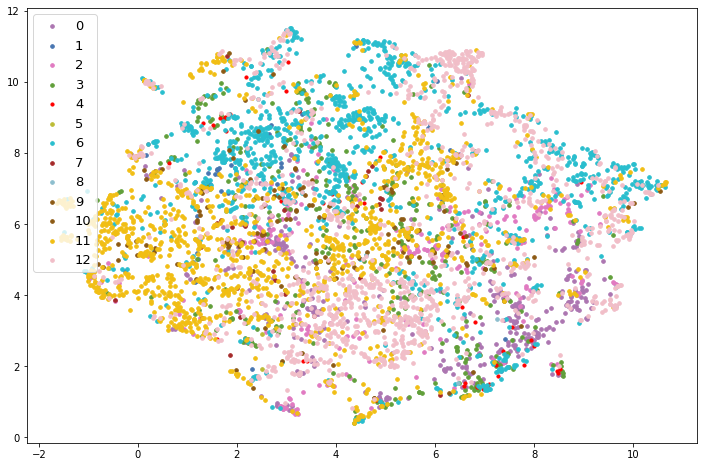

In [53]:
## visualize for roberta dimension
x0,y0 = [],[] # 0
x1,y1 = [],[] # 1
x2,y2 = [],[] # 2
x3,y3 = [],[] # 3
x4,y4 = [],[] # 4
x5,y5 = [],[] # 5
x6,y6 = [],[] # 6
x7,y7 = [],[] # 7
x8,y8 = [],[] # 8
x9,y9 = [],[] # 9
x10,y10 = [],[] # 10
x11,y11 = [],[] # 11
x12,y12 = [],[] # 12

L0,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12 = [],[],[],[],[],[],[],[],[],[],[],[],[]

for i in range(len(new_emb)): 
    dimension = candidate_roberta_cluster[i]
    if dimension == '0':
        x0.append(float(new_emb[i][0]))
        y0.append(float(new_emb[i][1]))
        L0.append(candidate_edgeids[i])
    elif dimension == '1':
        x1.append(float(new_emb[i][0]))
        y1.append(float(new_emb[i][1]))
        L1.append(candidate_edgeids[i])
    elif dimension == '2':
        x2.append(float(new_emb[i][0]))
        y2.append(float(new_emb[i][1]))
        L2.append(candidate_edgeids[i])
    elif dimension == '3':
        x3.append(float(new_emb[i][0]))
        y3.append(float(new_emb[i][1]))
        L3.append(candidate_edgeids[i])
    elif dimension == '4':
        x4.append(float(new_emb[i][0]))
        y4.append(float(new_emb[i][1]))
        L4.append(candidate_edgeids[i])
    elif dimension == '5':
        x5.append(float(new_emb[i][0]))
        y5.append(float(new_emb[i][1]))
        L5.append(candidate_edgeids[i])
    elif dimension == '6':
        x6.append(float(new_emb[i][0]))
        y6.append(float(new_emb[i][1]))
        L6.append(candidate_edgeids[i])
    elif dimension == '7':
        x7.append(float(new_emb[i][0]))
        y7.append(float(new_emb[i][1]))
        L7.append(candidate_edgeids[i])
    elif dimension == '8':
        x8.append(float(new_emb[i][0]))
        y8.append(float(new_emb[i][1]))
        L8.append(candidate_edgeids[i])
    elif dimension == '9':
        x9.append(float(new_emb[i][0]))
        y9.append(float(new_emb[i][1]))
        L9.append(candidate_edgeids[i])
    elif dimension == '10':
        x10.append(float(new_emb[i][0]))
        y10.append(float(new_emb[i][1]))
        L10.append(candidate_edgeids[i])
    elif dimension == '11':
        x11.append(float(new_emb[i][0]))
        y11.append(float(new_emb[i][1]))
        L11.append(candidate_edgeids[i])
    elif dimension == '12':
        x12.append(float(new_emb[i][0]))
        y12.append(float(new_emb[i][1]))
        L12.append(candidate_edgeids[i])
    else:
        print('no relation find')
        
plt.figure(figsize=(12,8))
plot0 = plt.scatter(x0, y0,color=(172/255,118/255,177/255), label='0',s=13)  
plot1 = plt.scatter(x1, y1,color=(72/255,118/255,177/255), label='1',s=13)    
plot2 = plt.scatter(x2, y2,color=(225/255,122/255,193/255),label='2',s=13)    
plot3 = plt.scatter(x3, y3,color=(97/255,159/255,58/255),label='3',s=13)
plot4 = plt.scatter(x4, y4,c='red',label='4',s=10)    
plot5 = plt.scatter(x5, y5,color=(188/255,188/255,53/255),label='5',s=13)    
plot6 = plt.scatter(x6, y6,color=(41/255,190/255,206/255),label='6',s=13)
plot7 = plt.scatter(x7, y7,c='brown',label='7',s=13)
plot8 = plt.scatter(x8, y8,color=(141/255,190/255,206/255),label='8',s=13)
plot9 = plt.scatter(x9, y9,color=(141/255,90/255,20/255),label='9',s=13)
plot10 = plt.scatter(x10, y10,color=(141/255,90/255,20/255),label='10',s=13)
plot11 = plt.scatter(x11, y11,color=(241/255,190/255,20/255),label='11',s=13)
plot12 = plt.scatter(x12, y12,color=(241/255,190/255,200/255),label='12',s=13)

plt.legend(['0','1','2','3','4','5','6','7','8','9','10','11','12'],loc='best',prop={'size':13})
# plt.savefig("sentence_auto.pdf")
plt.show()